Grade = 8/10

In [65]:
import pandas as pd

%matplotlib inline

In [66]:
df_codes = pd.read_csv("DOF_Parking_Violation_Codes.csv")

In [67]:
df_codes.head()

,CODE,DEFINITION,Manhattan 96th St. & below,All Other Areas
0,10,"Stopping, standing or parking where a sign, st...",$115,$115
1,11,Hotel Loading/Unloading: Standing or parking w...,$115,$115
2,12,Snow Emergency: Standing or parking where stan...,$95,$95
3,13,Taxi Stand: Standing or parking where standing...,$115,$115
4,14,General No Standing: Standing or parking where...,$115,$115


In [68]:
df = pd.read_csv("violations.csv", nrows=100000, low_memory=False, parse_dates=True)

In [69]:
df.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,GY,0.0,2013,-,0,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,WH,0.0,2012,-,0,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,NaN,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,WH,0.0,2010,-,0,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,BR,0.0,2012,-,0,NaN,NaN,NaN,NaN,NaN


## Soma's List of Awesome Questions

1. I want to make sure my Plate ID is a string. Can't lose the leading zeroes!
2. I don't think anyone's car was built in 0AD. Discard the '0's as NaN.
3. I want the dates to be dates! Read the read_csv documentation to find out how to make pandas automatically parse dates.
4. "Date first observed" is a pretty weird column, but it seems like it has a date hiding inside. Using a function with .apply, transform the string (e.g. "20140324") into a Python date. Make the 0's show up as NaN.
5. "Violation time" is... not a time. Make it a time.
6.  There sure are a lot of colors of cars, too bad so many of them are the same. Make "BLK" and "BLACK", "WT" and "WHITE", and any other combinations that you notice.
7. Join the data with the Parking Violations Code dataset from the NYC Open Data site.
8. How much money did NYC make off of parking violations?
9. What's the most lucrative kind of parking violation? The most frequent?
10. New Jersey has bad drivers, but does it have bad parkers, too? How much money does NYC make off of all non-New York vehicles?
11. Make a chart of the top few.
12. What time of day do people usually get their tickets? You can break the day up into several blocks - for example 12am-6am, 6am-12pm, 12pm-6pm, 6pm-12am.
13. What's the average ticket cost in NYC?
14. Make a graph of the number of tickets per day.
15. Make a graph of the amount of revenue collected per day.
16. Manually construct a dataframe out of https://dmv.ny.gov/statistic/2015licinforce-web.pdf (only NYC boroughts - bronx, queens, manhattan, staten island, brooklyn), having columns for borough name, abbreviation, and number of licensed drivers.
17. What's the parking-ticket-$-per-licensed-driver in each borough of NYC? Do this with pandas and the dataframe you just made, not with your head!1

In [70]:
df.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')

In [71]:
# I want to make sure my Plate ID is a string. Can't lose the leading zeroes!

df['Plate ID'] = df['Plate ID'].astype(str)

In [72]:
type(df['Plate ID'][0])

#Yay

str

In [73]:
#I don't think anyone's car was built in 0AD. Discard the '0's as NaN.
#df['Vehicle Year'].head() --> OK there are some 0s

df['Vehicle Year'] = df['Vehicle Year'].replace('0','NaN')

In [74]:
df['Vehicle Year'].head()

#YAY

0    2013
1    2012
2     NaN
3    2010
4    2012
Name: Vehicle Year, dtype: object

In [75]:
#I want the dates to be dates! Read the read_csv documentation to find out how to make pandas 
#automatically parse dates.

#Added parse_dates=True to the dataframe

In [76]:
df['Date First Observed'] = df['Date First Observed'].astype(str)

In [77]:
#"Date first observed" is a pretty weird column, but it seems like it has a date hiding inside. 
#Using a function with .apply, transform the string (e.g. "20140324") into a Python date. Make the 0's show up as NaN.

def date_observed_python(date_observed):
    if date_observed == '0':
        return ('NaN')
    else:
        return date_observed[:4] + '-' + date_observed[4:6] + '-' + date_observed[6:8]

#df['Date First Observed'] = pd.to_datetime(df['Date First Observed'].astype(str), format='%Y%m%d')

In [78]:
df['Date First Observed'] = df['Date First Observed'].apply(date_observed_python)

In [79]:
df['Date First Observed'].head(200)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28            NaN
29            NaN
          ...    
170           NaN
171           NaN
172           NaN
173           NaN
174           NaN
175           NaN
176    2013-07-26
177           NaN
178           NaN
179           NaN
180           NaN
181           NaN
182           NaN
183           NaN
184           NaN
185           NaN
186           NaN
187           NaN
188           NaN
189           NaN
190           NaN
191           NaN
192           NaN
193           NaN
194       

In [80]:
#"Violation time" is... not a time. Make it a time.
df['Violation Time'].head()

0    0752A
1    1240P
2    1243P
3    0232P
4    1239P
Name: Violation Time, dtype: object

In [81]:
import datetime
import numpy as np

def violation_time(str_violation_time):
    try:
        if str_violation_time == 'TrueM':
            return np.nan
        with_pm = str_violation_time + 'M'
        return datetime.datetime.strptime(with_pm,"%I%M%p")
    except:
        return np.nan
    
print(violation_time('0752A'))

1900-01-01 07:52:00


In [82]:
df['converted_violation_time'] = df['Violation Time'].apply(violation_time)

In [83]:
df['converted_violation_time'].head()

0   1900-01-01 07:52:00
1   1900-01-01 12:40:00
2   1900-01-01 12:43:00
3   1900-01-01 14:32:00
4   1900-01-01 12:39:00
Name: converted_violation_time, dtype: datetime64[ns]

In [84]:
import datetime

df['Issue Date'].head().astype(datetime.datetime)

0    08/04/2013
1    08/04/2013
2    08/05/2013
3    08/05/2013
4    08/08/2013
Name: Issue Date, dtype: object

In [85]:
#There sure are a lot of colors of cars, too bad so many of them are the same. 
#Make "BLK" and "BLACK", "WT" and "WHITE", and any other combinations that you notice.

df['Vehicle Color'].head()

0     GY
1     WH
2    NaN
3     WH
4     BR
Name: Vehicle Color, dtype: object

In [86]:
df['Vehicle Color'] = df['Vehicle Color'].astype(str)

In [87]:
def vehicle_color_str(vehicle_color):
    return str(vehicle_color.replace('WH','WHITE').replace('GY','GREY').replace('RD','RED').replace('YELL','YELLOW').replace('BR','BROWN').replace('BK','BLACK').replace('BL','BLUE'))

In [88]:
df['Vehicle Color'] = df['Vehicle Color'].apply(vehicle_color_str)

In [89]:
df['Vehicle Color'].head()

0     GREY
1    WHITE
2      nan
3    WHITE
4    BROWN
Name: Vehicle Color, dtype: object

In [90]:
#Join the data with the Parking Violations Code dataset from 
#the NYC Open Data site.

df['Violation Code'] = df['Violation Code'].astype(str)

In [91]:
new_df = df.merge(df_codes, left_on='Violation Code', right_on='CODE', how='left')
new_df

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,converted_violation_time,CODE,DEFINITION,Manhattan 96th St. & below,All Other Areas
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,NaN,NaN,NaN,NaN,NaN,1900-01-01 07:52:00,46,Standing or parking on the roadway side of a v...,$115,$115
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,NaN,NaN,NaN,NaN,NaN,1900-01-01 12:40:00,46,Standing or parking on the roadway side of a v...,$115,$115
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,NaN,NaN,NaN,NaN,NaN,1900-01-01 12:43:00,46,Standing or parking on the roadway side of a v...,$115,$115
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,NaN,NaN,NaN,NaN,NaN,1900-01-01 14:32:00,46,Standing or parking on the roadway side of a v...,$115,$115
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,NaN,NaN,NaN,NaN,NaN,1900-01-01 12:39:00,NaN,NaN,NaN,NaN
5,1283294217,T60DAR,NJ,PAS,08/11/2013,14,P-U,DODGE,P,37250,...,NaN,NaN,NaN,NaN,NaN,1900-01-01 18:17:00,14,General No Standing: Standing or parking where...,$115,$115
6,1283294229,GCR2838,NY,PAS,08/11/2013,14,VAN,NaN,P,37250,...,NaN,NaN,NaN,NaN,NaN,1900-01-01 19:41:00,14,General No Standing: Standing or parking where...,$115,$115
7,1283983620,XZ764G,NJ,PAS,08/07/2013,24,DELV,FORD,X,63430,...,NaN,NaN,NaN,NaN,NaN,1900-01-01 04:25:00,24,Authorized Vehicles Only: No parking where par...,$65,$60
8,1283983631,GBH9379,NY,PAS,08/07/2013,24,SDN,TOYOT,X,63430,...,NaN,NaN,NaN,NaN,NaN,1900-01-01 04:37:00,24,Authorized Vehicles Only: No parking where par...,$65,$60
9,1283983667,MCL78B,NJ,PAS,07/18/2013,24,SDN,SUBAR,H,0,...,NaN,NaN,NaN,NaN,NaN,1900-01-01 08:39:00,24,Authorized Vehicles Only: No parking where par...,$65,$60


In [92]:
#How much money did NYC make off of parking violations?

new_df.columns[45]

'DEFINITION'

In [93]:
#new_df['Manhattan\xa0 96th St. & below']
new_df['Manhattan\xa0 96th St. & below'] = new_df['Manhattan\xa0 96th St. & below'].astype(str)

def fine_int(fine_str):
    return fine_str.replace("$","")
new_df['fine_int'] = new_df['Manhattan\xa0 96th St. & below'].apply(fine_int)

fine_sum = 0
for item in new_df['fine_int']:
    if item != 'nan' and item != '100\n(Regular Tow, plus violation fine)' and item != 'vary':
        int_item = int(item)
        fine_sum = fine_sum + int_item 
print(fine_sum)

6552720


In [94]:
#What's the most lucrative kind of parking violation? 
#The most frequent?

def all_fines(fines):
    return int(fines.replace("nan","0").replace('100\n(Regular Tow, plus violation fine)',"0").replace('vary','0'))
new_df['Fines'] = new_df['fine_int'].apply(all_fines)

In [95]:
new_df['Fines'].max()

180

In [96]:
new_df['Fines'].value_counts()

115    38346
0      32170
65     24719
95      3187
165      934
180      339
60       305
Name: Fines, dtype: int64

In [97]:
#New Jersey has bad drivers, but does it have bad parkers, too? 
#How much money does NYC make off of all non-New York vehicles?

is_not_stateless = new_df['Registration State'].notnull()
df[is_not_stateless]['Registration State']

is_not_NY = ~df[is_not_stateless]['Registration State'].str.contains('NY')
new_df[is_not_stateless & is_not_NY]

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,converted_violation_time,CODE,DEFINITION,Manhattan 96th St. & below,All Other Areas,fine_int,Fines
5,1283294217,T60DAR,NJ,PAS,08/11/2013,14,P-U,DODGE,P,37250,...,NaN,NaN,NaN,1900-01-01 18:17:00,14,General No Standing: Standing or parking where...,$115,$115,115,115
7,1283983620,XZ764G,NJ,PAS,08/07/2013,24,DELV,FORD,X,63430,...,NaN,NaN,NaN,1900-01-01 04:25:00,24,Authorized Vehicles Only: No parking where par...,$65,$60,65,65
9,1283983667,MCL78B,NJ,PAS,07/18/2013,24,SDN,SUBAR,H,0,...,NaN,NaN,NaN,1900-01-01 08:39:00,24,Authorized Vehicles Only: No parking where par...,$65,$60,65,65
17,1286246416,815M342,MD,PAS,07/30/2013,20,SUBN,SATUR,T,0,...,NaN,NaN,NaN,1900-01-01 07:24:00,20,General No Parking: No parking where parking i...,$65,$60,65,65
19,1286282330,YZY6476,NC,PAS,07/29/2013,20,SDN,NISSA,T,32030,...,NaN,NaN,NaN,1900-01-01 07:36:00,20,General No Parking: No parking where parking i...,$65,$60,65,65
20,1286282342,WBJ819,LA,PAS,08/07/2013,17,SUBN,HONDA,T,0,...,NaN,NaN,NaN,1900-01-01 08:47:00,17,Authorized Vehicles Only: Standing or parking ...,$95,$95,95,95
22,1286654920,ZTR66R,NJ,PAS,07/18/2013,50,SDN,N/S,T,0,...,NaN,NaN,NaN,1900-01-01 10:20:00,50,"Stopping, standing or parking in a crosswalk. ...",$115,$115,115,115
24,1286807062,P193871,IL,PAS,08/10/2013,40,SDN,SCIO,T,26630,...,NaN,NaN,NaN,1900-01-01 10:18:00,40,"Stopping, standing or parking closer than 15 f...",$115,$115,115,115
27,1286808807,HHG3545,PA,PAS,08/06/2013,20,SDN,TOYOT,T,21130,...,NaN,NaN,NaN,1900-01-01 09:15:00,20,General No Parking: No parking where parking i...,$65,$60,65,65
30,1287517304,6B22924,ID,PAS,07/22/2013,20,SDN,VOLKS,T,36250,...,NaN,NaN,NaN,1900-01-01 17:21:00,20,General No Parking: No parking where parking i...,$65,$60,65,65


In [98]:
new_df[is_not_stateless & is_not_NY]['Fines']

5        115
7         65
9         65
17        65
19        65
20        95
22       115
24       115
27        65
30        65
31       115
32       115
33        65
34        65
37         0
38       115
43       115
44        65
47       115
51         0
52       115
53       115
54       115
57       115
66       115
67        65
68        65
69        95
70        95
71        95
        ... 
99879     65
99880    115
99883     65
99884     65
99885     65
99887     65
99888     65
99892     65
99894     65
99895     65
99896     65
99898     65
99899      0
99903     65
99906     65
99912     65
99913     65
99926     65
99927     65
99929     65
99938     65
99941    115
99945    115
99952     65
99954    115
99958    115
99966    115
99967    115
99971     65
99983      0
Name: Fines, dtype: int64

In [99]:
#Make a chart of the top few.
new_df[is_not_stateless & is_not_NY]['Fines'].sort_values(ascending=False)

#Why aren't the $180 lumped together?

21302    180
41663    180
37952    180
47071    180
26289    180
1718     180
7671     180
8005     180
62578    180
35382    180
5686     180
40367    180
16719    180
28409    180
20021    180
28408    180
36298    180
28407    180
8711     180
26330    180
63662    180
1963     180
17800    180
8648     180
35107    180
9986     180
20938    180
20949    180
17819    180
17201    180
        ... 
81714      0
81741      0
81413      0
81412      0
81411      0
81395      0
81166      0
81168      0
81174      0
81175      0
81184      0
39579      0
81213      0
39558      0
81215      0
39553      0
81216      0
81219      0
81221      0
81234      0
81246      0
39511      0
81247      0
81302      0
81318      0
81327      0
81352      0
81354      0
81393      0
99983      0
Name: Fines, dtype: int64

In [100]:
#What time of day do people usually get their tickets? 
#You can break the day up into several blocks - 
#for example 12am-6am, 6am-12pm, 12pm-6pm, 6pm-12am.

#new_df['Violation Time']

In [101]:
#What's the average ticket cost in NYC?

new_df['Fines'].describe()

count    100000.000000
mean         65.527200
std          49.845475
min           0.000000
25%           0.000000
50%          65.000000
75%         115.000000
max         180.000000
Name: Fines, dtype: float64

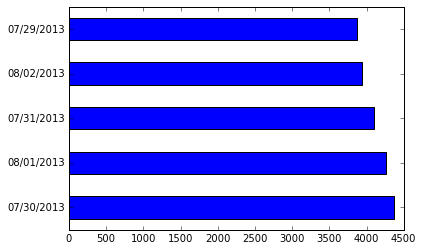

In [102]:
#Make a graph of the number of tickets per day.

new_df['Issue Date'].value_counts().head().plot(kind='barh')

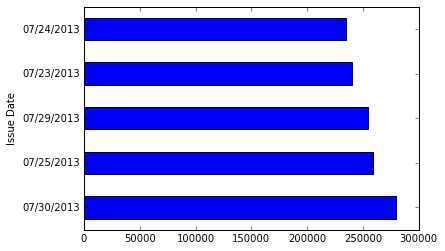

In [103]:
#Make a graph of the amount of revenue collected per day.

new_df.groupby('Issue Date')['Fines'].sum().sort_values(ascending=False).head().plot(kind='barh')

#What is groupby again?

In [104]:
#Manually construct a dataframe out of 
#https://dmv.ny.gov/statistic/2015licinforce-web.pdf 
#(only NYC boroughts - bronx, queens, manhattan, staten island, brooklyn), having columns for borough name, abbreviation, 
#and number of licensed drivers.

df_dmv = pd.read_csv("dmv.csv")

#How to get the full name of each borough?

In [105]:
df_dmv.head()

,Borough,Total
0,BX,456847
1,K,983769
2,NY,748583
3,Q,1134064
4,R,304250


In [106]:
#What's the parking-ticket-$-per-licensed-driver in 
#each borough of NYC? Do this with pandas and the 
#dataframe you just made, not with your head!


#I DON'T KNOW HOW TO DO THIS

In [107]:
newest_df = new_df.merge(df_dmv, left_on='Violation County', right_on='Borough', how='left')
newest_df

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Double Parking Violation,converted_violation_time,CODE,DEFINITION,Manhattan 96th St. & below,All Other Areas,fine_int,Fines,Borough,Total
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,NaN,1900-01-01 07:52:00,46,Standing or parking on the roadway side of a v...,$115,$115,115,115,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,NaN,1900-01-01 12:40:00,46,Standing or parking on the roadway side of a v...,$115,$115,115,115,NY,748583.0
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,NaN,1900-01-01 12:43:00,46,Standing or parking on the roadway side of a v...,$115,$115,115,115,NY,748583.0
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,NaN,1900-01-01 14:32:00,46,Standing or parking on the roadway side of a v...,$115,$115,115,115,NY,748583.0
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,NaN,1900-01-01 12:39:00,NaN,NaN,nan,NaN,nan,0,NY,748583.0
5,1283294217,T60DAR,NJ,PAS,08/11/2013,14,P-U,DODGE,P,37250,...,NaN,1900-01-01 18:17:00,14,General No Standing: Standing or parking where...,$115,$115,115,115,NY,748583.0
6,1283294229,GCR2838,NY,PAS,08/11/2013,14,VAN,NaN,P,37250,...,NaN,1900-01-01 19:41:00,14,General No Standing: Standing or parking where...,$115,$115,115,115,NY,748583.0
7,1283983620,XZ764G,NJ,PAS,08/07/2013,24,DELV,FORD,X,63430,...,NaN,1900-01-01 04:25:00,24,Authorized Vehicles Only: No parking where par...,$65,$60,65,65,K,983769.0
8,1283983631,GBH9379,NY,PAS,08/07/2013,24,SDN,TOYOT,X,63430,...,NaN,1900-01-01 04:37:00,24,Authorized Vehicles Only: No parking where par...,$65,$60,65,65,K,983769.0
9,1283983667,MCL78B,NJ,PAS,07/18/2013,24,SDN,SUBAR,H,0,...,NaN,1900-01-01 08:39:00,24,Authorized Vehicles Only: No parking where par...,$65,$60,65,65,K,983769.0


In [108]:
newest_df['Violation County'].value_counts()

NY       31083
K        15794
Q        12943
BX        8760
R         2504
RICH         1
BRONX        1
Name: Violation County, dtype: int64

0